In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.inspection import plot_partial_dependence
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

import xgboost as xgb

In [7]:
data = pd.read_csv('Model_data.csv')
data.Balance = data.Balance.astype('int32') #Truncating decimals

In [8]:
data.drop(data.Gender[data.Gender== 'O'].index, axis = 0, inplace= True) # Removed 196 rows with `Gender` = 'O'

In [9]:
# A class for pretty printing
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
# function for validation on test data   
def classification_report(y_true, y_prediction, type_of_data='Enter Over/Under/Original sampled', type_of_classifier='ClassifierName'):
    """Print Classification report"""
    
    accuracy = accuracy_score(y_true, y_prediction)
    precision = precision_score(y_true, y_prediction)
    recall = recall_score(y_true, y_prediction)
    f1 = f1_score(y_true, y_prediction)
    
    print('Classification Report on Testing Data:\n'+ color.BOLD + type_of_data, 'data\n'+color.END+color.RED+color.BOLD+type_of_classifier,'Classifier'+color.END+color.END)
    print()
    print('---------------------------------------')
    print(color.BOLD + 'Recall: %s' %recall + color.END)
    print('Precision: %s' %precision)
    print('F1 score: %s' %f1)
    print('Accuracy: %s' %accuracy)
    print('---------------------------------------')
    print()


# A function for cross-validation report    
def cross_val_report(classifier, train_data, train_label, cv=10, scoring=['recall','precision', 'f1','accuracy']):
    
    score = cross_validate(classifier, train_data, train_label, cv=cv, scoring= scoring)
    recall = np.mean(score['test_recall'])
    precision = np.mean(score['test_precision'])
    f1 = np.mean(score['test_f1'])
    accuracy= np.mean(score['test_accuracy'])
    print('Cross Validation Report')
    print(color.BOLD + 'Recall: %s' %recall + color.END)
    print('Precision: %s' %precision)
    print('F1: %s' %f1)
    print('Accuracy: %s' %accuracy)
    print()
    print("*Mean values presented")
    print('---------------------------------------')

In [10]:
df = pd.get_dummies(data, columns=['Gender','Occupation'], drop_first = True)
df.head()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Gender_M,Occupation_SAL,Occupation_SELF-EMP,Occupation_SENP
0,0,41,91519,38,926,15,1,0,1,0
1,0,52,117288,17,768,13,1,1,0,0
2,0,31,259827,8,816,5,0,0,0,1
3,0,45,26677,14,353,18,0,0,0,0
4,0,39,43440,1,751,31,0,0,0,1


In [11]:
data.query('Age>40 | SCR>900')

,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,SCR,Holding_Period
0,0,41,M,91519,SELF-EMP,38,926,15
1,0,52,M,117288,SAL,17,768,13
3,0,45,F,26677,PROF,14,353,18
5,0,45,M,403324,SENP,11,364,2
9,1,44,M,10791,SELF-EMP,17,678,3
...,...,...,...,...,...,...,...,...
19986,1,45,M,22461,SAL,40,785,9
19987,0,45,M,86989,SELF-EMP,9,260,21
19993,0,50,M,116826,SAL,4,876,22
19994,0,51,F,85937,PROF,0,495,14


(array([1228., 1744., 2872., 2104., 1872., 2188., 1724., 2088., 1580.,
        2404.]),
 array([21. , 24.4, 27.8, 31.2, 34.6, 38. , 41.4, 44.8, 48.2, 51.6, 55. ]),
 <a list of 10 Patch objects>)

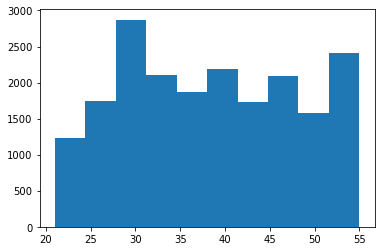

In [12]:
plt.hist(data.Age)

In [13]:
# Scale Age by zscore

In [14]:
# A class for pretty printing
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
# function for validation on test data   
def classification_report(y_true, y_prediction, type_of_data='Enter Over/Under/Original sampled', type_of_classifier='ClassifierName'):
    """Print Classification report"""
    
    accuracy = accuracy_score(y_true, y_prediction)
    precision = precision_score(y_true, y_prediction)
    recall = recall_score(y_true, y_prediction)
    f1 = f1_score(y_true, y_prediction)
    
    print('Classification Report on Testing Data:\n'+ color.BOLD + type_of_data, 'data\n'+color.END+color.RED+color.BOLD+type_of_classifier,'Classifier'+color.END+color.END)
    print()
    print('---------------------------------------')
    print(color.BOLD + 'Recall: %s' %recall + color.END)
    print('Precision: %s' %precision)
    print('F1 score: %s' %f1)
    print('Accuracy: %s' %accuracy)
    print('---------------------------------------')
    print()


# A function for cross-validation report    
def cross_val_report(classifier, train_data, train_label, cv=10, scoring=['recall','precision', 'f1','accuracy']):
    
    score = cross_validate(classifier, train_data, train_label, cv=cv, scoring= scoring)
    recall = np.mean(score['test_recall'])
    precision = np.mean(score['test_precision'])
    f1 = np.mean(score['test_f1'])
    accuracy= np.mean(score['test_accuracy'])
    print('Cross Validation Report')
    print(color.BOLD + 'Recall: %s' %recall + color.END)
    print('Precision: %s' %precision)
    print('F1: %s' %f1)
    print('Accuracy: %s' %accuracy)
    print()
    print("*Mean values presented")
    print('---------------------------------------')
    
    
    
def error_plot(predict_proba, target_label):
    """(predict_proba, y_test),
    targetlabel- prob_of_prediction=1
    center is best
    left is when my model predicted a non loan prospect would take a loan
    right is when my model misses a loan prospect(minimize this)"""
    prob = predict_proba[:,1]
    actual = y_test_orig
    error = actual-prob # Label value- predicted prob of target=1
    plt.hist(error)
    plt.show()

In [15]:
X = df.iloc[:,1:].to_numpy()
y = df.iloc[:,0].to_numpy()

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X,y, shuffle= True, stratify=y)

In [16]:
stdScaler = StandardScaler()
X_train = stdScaler.fit_transform(X_train_orig)
X_test = stdScaler.transform(X_test_orig)

In [17]:
X_under_train, y_under_train = NearMiss().fit_resample(X_train_orig, y_train_orig)
stdScalerU = StandardScaler()
X_under_train = stdScalerU.fit_transform(X_under_train)
X_under_test = stdScalerU.transform(X_test_orig)

In [18]:
X_over_train, y_over_train = SMOTE().fit_resample(X_train_orig, y_train_orig)
stdScalerO = StandardScaler()
X_over_train = stdScalerO.fit_transform(X_over_train)
X_over_test = stdScalerO.transform(X_test_orig)

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

Classification Report on Testing Data:
Original data
etc Classifier

---------------------------------------
Recall: 0.13348946135831383
Precision: 0.5876288659793815
F1 score: 0.21755725190839698
Accuracy: 0.9171884467784286
---------------------------------------



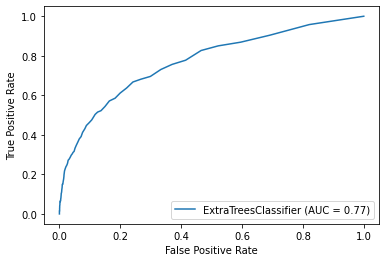

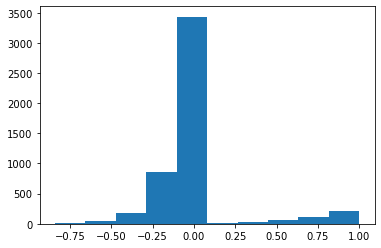

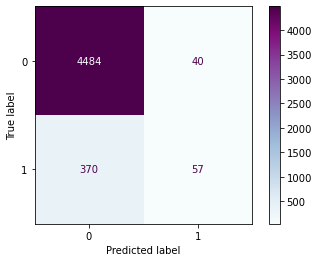

In [20]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train_orig)

y_predict_etc= etc.predict(X_test)
classification_report(y_test_orig, y_predict_etc, 'Original', 'etc')
plot_roc_curve(etc, X_test, y_test_orig)
plt.show()
error_plot(etc.predict_proba(X_test), y_test_orig)
plot_confusion_matrix(etc, X_test, y_test_orig, cmap = 'BuPu')
# cross_val_report(knn, X_over_train, y_over_train)

Classification Report on Testing Data:
Undersampled data
KNN Classifier

---------------------------------------
Recall: 0.03044496487119438
Precision: 0.6842105263157895
F1 score: 0.05829596412556053
Accuracy: 0.9151686527974147
---------------------------------------



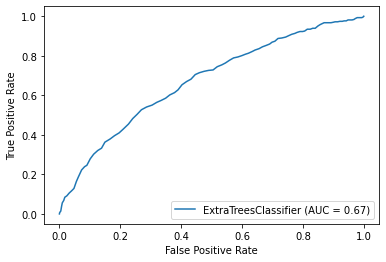

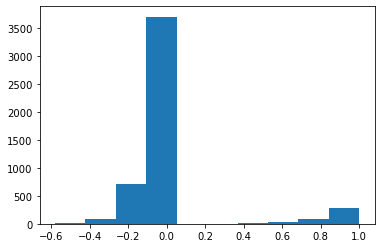

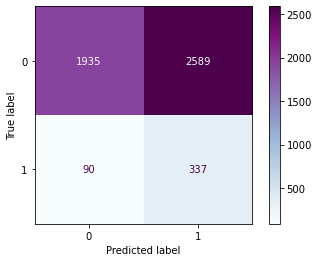

In [21]:
etcU = ExtraTreesClassifier()
etcU.fit(X_train, y_train_orig)

etcU.fit(X_under_train, y_under_train)
y_predict_etcU= etc.predict(X_under_test)
classification_report(y_test_orig, y_predict_etcU, 'Undersampled', 'KNN')
plot_roc_curve(etcU, X_under_test, y_test_orig)
plt.show()
error_plot(etc.predict_proba(X_under_test), y_test_orig)
plot_confusion_matrix(etcU, X_under_test, y_test_orig, cmap = 'BuPu')
# cross_val_report(knn, X_over_train, y_over_train)

Classification Report on Testing Data:
Oversampled data
etcO Classifier

---------------------------------------
Recall: 0.4449648711943794
Precision: 0.2543507362784471
F1 score: 0.32367972742759793
Accuracy: 0.8396283579074935
---------------------------------------



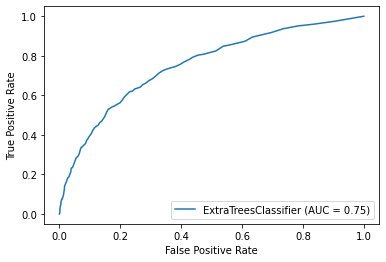

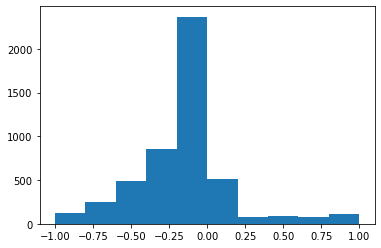

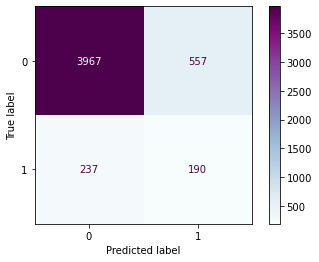

In [22]:

etcO = ExtraTreesClassifier()

etcO.fit(X_over_train, y_over_train)
y_predict_knnO= etcO.predict(X_over_test)
classification_report(y_test_orig, y_predict_knnO, 'Oversampled', 'etcO')
plot_roc_curve(etcO, X_over_test, y_test_orig)
plt.show()
error_plot(etcO.predict_proba(X_over_test), y_test_orig)
plot_confusion_matrix(etcO, X_over_test, y_test_orig, cmap = 'BuPu')
# cross_val_report(knn, X_over_train, y_over_train)

In [23]:
import lime
import lime.lime_tabular

In [24]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_over_train, training_labels= y_over_train)
exp = explainer.explain_instance(X_over_test[1],y_predict_knnO[1])

TypeError: 'numpy.int64' object is not callable

In [ ]:

etcO = ExtraTreesClassifier()

etcO.fit(X_over_train, y_over_train)
y_predict_knnO= etcO.predict(X_over_test)
classification_report(y_test_orig, y_predict_knnO, 'Oversampled', 'etcO')
plot_roc_curve(etcO, X_over_test, y_test_orig)
plt.show()
error_plot(etcO.predict_proba(X_over_test), y_test_orig)
plot_confusion_matrix(etcO, X_over_test, y_test_orig, cmap = 'BuPu')
# cross_val_report(knn, X_over_train, y_over_train)

In [ ]:
y_predict_knnO[1]

In [ ]:
# print("Original:     "+color.BOLD+ "X_original,y_original"+color.END+"::  X_train_orig, X_test_orig, y_train_orig, y_test_orig")
# print()
# print("Undersampled:"+color.BOLD+ " X_under, y_under"+color.END+"     ::  X_under_train, y_under_train")
# print()
# print("Oversampled:"+color.BOLD+ "  X_over, y_over"+color.END+"       ::  X_over_train, y_over_train")

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train_orig)
y_predict_knn= knn.predict(X_test)
classification_report(y_test_orig, y_predict_knn, 'Original', 'KNN')
plot_roc_curve(knn, X_test, y_test_orig)
plt.show()
error_plot(knn.predict_proba(X_test), y_test_orig)
plot_confusion_matrix(knn, X_test, y_test_orig, cmap = 'BuPu')
# cross_val_report(knn, X_over_train, y_over_train)

In [ ]:
knnU = KNeighborsClassifier(n_neighbors = 5)
knnU.fit(X_under_train, y_under_train)
y_predict_knnU= knnU.predict(X_under_test)
classification_report(y_test_orig, y_predict_knnU, 'Undersampled', 'KNN')
plot_roc_curve(knnU, X_under_test, y_test_orig)
plt.show()
error_plot(knnU.predict_proba(X_under_test), y_test_orig)
plot_confusion_matrix(knnU, X_under_test, y_test_orig, cmap = 'BuPu')
# cross_val_report(knn, X_over_train, y_over_train)

In [ ]:
knnO = KNeighborsClassifier(n_neighbors = 2)
knnO.fit(X_over_train, y_over_train)
y_predict_knnO= knnO.predict(X_over_test)
classification_report(y_test_orig, y_predict_knnO, 'Oversampled', 'KNN')
plot_roc_curve(knnO, X_over_test, y_test_orig)
plt.show()
error_plot(knnO.predict_proba(X_over_test), y_test_orig)
plot_confusion_matrix(knnO, X_over_test, y_test_orig, cmap = 'BuPu')
# cross_val_report(knn, X_over_train, y_over_train)

In [ ]:
knnO = KNeighborsClassifier(n_neighbors = 5)
knnO.fit(X_over_train, y_over_train)
y_predict_knnO= knnO.predict(X_over_test)
classification_report(y_test_orig, y_predict_knnO, 'Oversampled', 'KNN')
plot_roc_curve(knnO, X_over_test, y_test_orig)
plt.show()
error_plot(knnO.predict_proba(X_over_test), y_test_orig)
plot_confusion_matrix(knnO, X_over_test, y_test_orig, cmap = 'BuPu')
# cross_val_report(knn, X_over_train, y_over_train)

----
----

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train_orig)
y_predict_dt= dt.predict(X_test)
classification_report(y_test_orig, y_predict_dt, 'Original', 'Decision Tree')
plot_roc_curve(dt, X_test, y_test_orig)
plt.show()
error_plot(dt.predict_proba(X_test), y_test_orig)
plot_confusion_matrix(dt, X_test, y_test_orig, cmap = 'BuPu')
plt.show()
(pd.Series(dt.feature_importances_, index=df.iloc[:,1:].columns)
   .nlargest(8)
   .plot(kind='barh'))
plt.show()

In [ ]:
data[data.Target ==0].shape

In [ ]:
dtU = DecisionTreeClassifier(max_depth =3)
dtU.fit(X_under_train, y_under_train)
y_predict_dtU= dtU.predict(X_under_test)
classification_report(y_test_orig, y_predict_dtU, 'Undersampled', 'Decision Tree')
plot_roc_curve(dtU, X_under_test, y_test_orig)
plt.show()
error_plot(dtU.predict_proba(X_under_test), y_test_orig)
plot_confusion_matrix(dtU, X_under_test, y_test_orig, cmap = 'BuPu')
plt.show()
(pd.Series(dtU.feature_importances_, index=df.iloc[:,1:].columns)
   .nlargest(8)
   .plot(kind='barh'))
plt.show()

In [ ]:
dtO = DecisionTreeClassifier(max_depth = 6)
dtO.fit(X_over_train, y_over_train)
y_predict_dtO= dtO.predict(X_over_test)
classification_report(y_test_orig, y_predict_dtO, 'Oversampled', 'Decision Tree')
plot_roc_curve(dtO, X_over_test, y_test_orig)
plt.show()
error_plot(dtO.predict_proba(X_over_test), y_test_orig)
plot_confusion_matrix(dtO, X_over_test, y_test_orig, cmap = 'BuPu')
# cross_val_report(knn, X_over_train, y_over_train)
plt.show()
(pd.Series(dtO.feature_importances_, index=df.iloc[:,1:].columns)
   .nlargest(8)
   .plot(kind='barh'))
plt.show()

___
____

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train_orig)
y_predict_lr= lr.predict(X_test)
classification_report(y_test_orig, y_predict_lr, 'Original', 'Logistic Regression')
plot_roc_curve(lr, X_test, y_test_orig)
plt.show()
error_plot(lr.predict_proba(X_test), y_test_orig)
plot_confusion_matrix(lr, X_test, y_test_orig, cmap = 'BuPu')

In [ ]:
lrU = LogisticRegression()
lrU.fit(X_under_train, y_under_train)
y_predict_lrU= lrU.predict(X_under_test)
classification_report(y_test_orig, y_predict_lrU, 'Undersampled', 'Logistic Regression')
plot_roc_curve(lrU, X_under_test, y_test_orig)
plt.show()
error_plot(lrU.predict_proba(X_under_test), y_test_orig)
plot_confusion_matrix(lrU, X_under_test, y_test_orig, cmap = 'BuPu')


In [ ]:
print(df.iloc[:,1:].columns)
plt.scatter(x= np.arange(9),y = lrU.coef_)

z= c1*Age + c2*Balance + c3*No._tran +..  z = 10000

y = 1/(1+ e^(-z))

In [ ]:
lrO = LogisticRegression()
lrO.fit(X_over_train, y_over_train)
y_predict_lrO= lrO.predict(X_over_test)
classification_report(y_test_orig, y_predict_lrO, 'Oversampled', 'Logistic Regression')
plot_roc_curve(lrO, X_over_test, y_test_orig)
plt.show()
error_plot(lrO.predict_proba(X_over_test), y_test_orig)
plot_confusion_matrix(lrO, X_over_test, y_test_orig, cmap = 'BuPu')
plt.show()

In [ ]:
print(df.iloc[:,1:].columns)
plt.scatter(x= np.arange(9),y = lrO.coef_)

-----
-----

In [ ]:
svm = SVC(probability = True)
svm.fit(X_train, y_train_orig)
y_predict_svm= svm.predict(X_test)
classification_report(y_test_orig, y_predict_svm, 'Original', 'SVM')
plot_roc_curve(svm, X_test, y_test_orig)
plt.show()
error_plot(svm.predict_proba(X_test), y_test_orig)
plot_confusion_matrix(svm, X_test, y_test_orig, cmap = 'BuPu')

In [ ]:
svmU = SVC( probability = True)
svmU.fit(X_under_train, y_under_train)
y_predict_svmU= svmU.predict(X_under_test)
classification_report(y_test_orig, y_predict_svmU, 'Undersampled', 'SVM')
plot_roc_curve(svmU, X_under_test, y_test_orig)
plt.show()
error_plot(svmU.predict_proba(X_under_test), y_test_orig)
plot_confusion_matrix(svmU, X_under_test, y_test_orig, cmap = 'BuPu')
plt.show()

In [ ]:
svmO = SVC(kernel = 'sigmoid', probability = True)
svmO.fit(X_over_train, y_over_train)
y_predict_svmO= svmO.predict(X_over_test)
classification_report(y_test_orig, y_predict_svmO, 'Oversampled', 'SVM')
plot_roc_curve(svmO, X_over_test, y_test_orig)
plt.show()
error_plot(svmO.predict_proba(X_over_test), y_test_orig)
plot_confusion_matrix(svmO, X_over_test, y_test_orig, cmap = 'BuPu')
plt.show()

-------
-------

Classification Report on Testing Data:
Original data
Random Forest Classifier

---------------------------------------
Recall: 0.02810304449648712
Precision: 0.75
F1 score: 0.05417607223476298
Accuracy: 0.9153706321955161
---------------------------------------



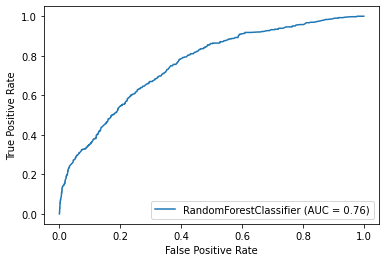

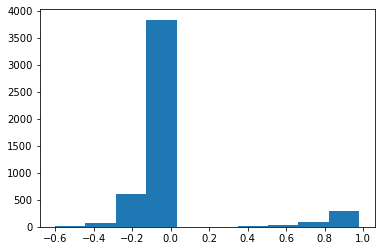

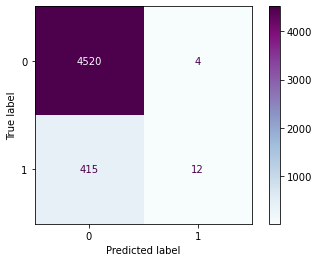

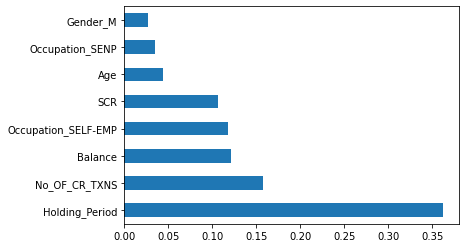

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5, n_estimators = 4)
rf.fit(X_train, y_train_orig)
y_predict_rf= rf.predict(X_test)
classification_report(y_test_orig, y_predict_rf, 'Original', 'Random Forest')
plot_roc_curve(rf, X_test, y_test_orig)
plt.show()
error_plot(rf.predict_proba(X_test), y_test_orig)
plot_confusion_matrix(rf, X_test, y_test_orig, cmap = 'BuPu')
plt.show()
(pd.Series(rf.feature_importances_, index=df.iloc[:,1:].columns)
   .nlargest(8)
   .plot(kind='barh'))
plt.show()

Classification Report on Testing Data:
Undersampled data
Random Forest Classifier

---------------------------------------
Recall: 0.810304449648712
Precision: 0.10125841381328651
F1 score: 0.18002081165452655
Accuracy: 0.3633609371844072
---------------------------------------



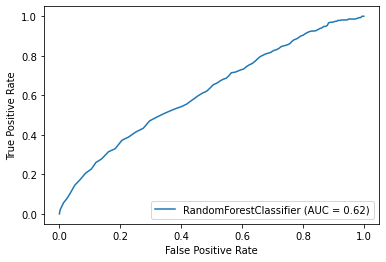

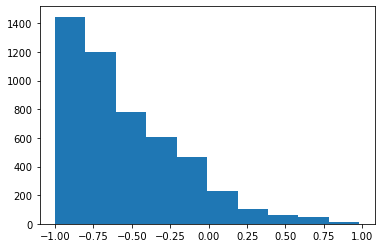

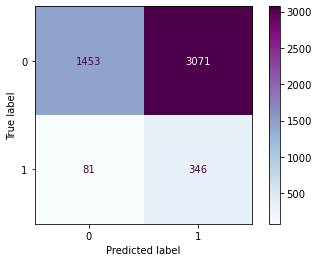

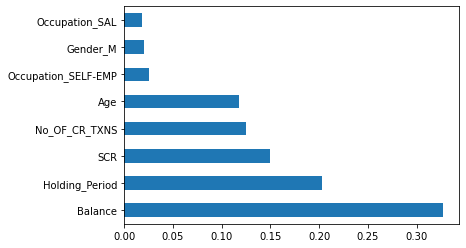

In [28]:
rfU = RandomForestClassifier()
rfU.fit(X_under_train, y_under_train)
y_predict_rfU= rfU.predict(X_under_test)
classification_report(y_test_orig, y_predict_rfU, 'Undersampled', 'Random Forest')
plot_roc_curve(rfU, X_under_test, y_test_orig)
plt.show()
error_plot(rfU.predict_proba(X_under_test), y_test_orig)
plot_confusion_matrix(rfU, X_under_test, y_test_orig, cmap = 'BuPu')
plt.show()
(pd.Series(rfU.feature_importances_, index=df.iloc[:,1:].columns)
   .nlargest(8)
   .plot(kind='barh'))
plt.show()

Classification Report on Testing Data:
Oversampled data
Random Forest Classifier

---------------------------------------
Recall: 0.44730679156908665
Precision: 0.26454293628808867
F1 score: 0.33246301131418626
Accuracy: 0.845081801656231
---------------------------------------



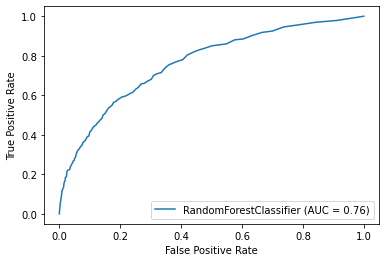

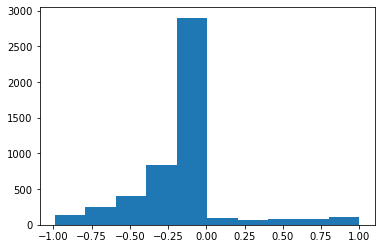

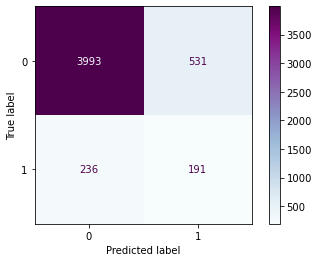

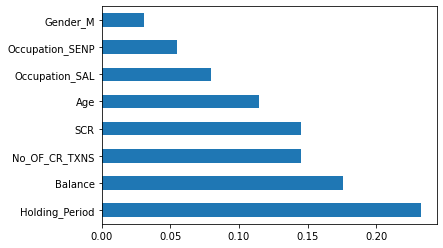

In [29]:
rfO = RandomForestClassifier()
rfO.fit(X_over_train, y_over_train)
y_predict_rfO= rfO.predict(X_over_test)
classification_report(y_test_orig, y_predict_rfO, 'Oversampled', 'Random Forest')
plot_roc_curve(rfO, X_over_test, y_test_orig)
plt.show()
error_plot(rfO.predict_proba(X_over_test), y_test_orig)
plot_confusion_matrix(rfO, X_over_test, y_test_orig, cmap = 'BuPu')

plt.show()
(pd.Series(rfO.feature_importances_, index=df.iloc[:,1:].columns)
   .nlargest(8)
   .plot(kind='barh'))
plt.show()

-------
----------

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train, y_train_orig)
# confusion_matrix(y_train_orig, kmeans.labels_)
confusion_matrix(y_test_orig, kmeans.predict(X_test_orig))

In [ ]:
(kmeans.labels_ == y_train_orig).sum()

In [ ]:
# confusion_matrix(y_train_orig, kmeans.labels_)

In [ ]:
kmeansU = KMeans(n_clusters=2)
kmeansU.fit(X_under_train, y_under_train)
# confusion_matrix(y_under_train, kmeansU.labels_)
confusion_matrix(y_test_orig, kmeansU.predict(X_under_test))

In [ ]:
kmeansO = KMeans(n_clusters=2)
kmeansO.fit(X_over_train, y_over_train)
print(confusion_matrix(y_over_train, kmeansO.labels_), end = ' Training Data\n\n')
kmeansO.transform(X_over_test)
print(confusion_matrix(y_test_orig, kmeansO.predict(X_over_test)), end = ' Testing Data\n')

In [ ]:
df.iloc[:,1:]
# df.iloc[:,0]

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
db = DBSCAN(min_samples=100)
db.fit(X_train)
db.labels_

In [ ]:
pd.DataFrame(db.labels_)[0].unique()

----------
----------

Catboost

In [ ]:
from catboost import CatBoost, Pool, CatBoostClassifier

In [ ]:
Xdf = data.iloc[:,1:]
ydf = data.iloc[:,0]
X_train_origdf, X_test_origdf,y_train_origdf, y_test_origdf = train_test_split(Xdf,ydf, shuffle= True, stratify=y)

In [ ]:
cat_features= ['Gender', 'Occupation']

In [ ]:
model_cb = CatBoostClassifier(task_type='CPU', iterations = 100,
                             random_state=2021,
                             eval_metric='F1')

In [ ]:
model_cb.fit(X_train_origdf,y_train_origdf, cat_features=cat_features, plot=True)

In [ ]:
y_pred = model_cb.predict(X_test_origdf)

In [ ]:
f1 = f1_score(y_test_origdf,y_pred)

In [ ]:
classification_report(y_test_origdf,y_pred, type_of_classifier='CatBoost')
plot_roc_curve(model_cb, X_test_origdf, y_test_orig)
plt.show()
error_plot(model_cb.predict_proba(X_test_origdf), y_test_orig)
plot_confusion_matrix(model_cb, X_test_origdf, y_test_orig, cmap = 'BuPu')

plt.show()
(pd.Series(model_cb.feature_importances_, index=X_test_origdf.iloc[:,:].columns)
   .nlargest(8)
   .plot(kind='barh'))
plt.show()

cb = CatBoost({'iterations': 100, 'verbose': False, 'random_seed': 42})
cb.fit(train_pool);
print(cb.eval_metrics(validation_pool, ['Recall'])['Recall'][-1])

------

In [ ]:
X_train_origdf, X_test_origdf,y_train_origdf, y_test_origdf = train_test_split(Xdf,ydf, shuffle= True, stratify=y)

In [ ]:
X_train_origdf, X_test_origdf,y_train_origdf, y_test_origdf = train_test_split(Xdf,ydf, shuffle= True, stratify=y)

In [ ]:
# X_under_train_df, y_under_train_df = NearMiss().fit_resample(X_train_origdf, y_train_origdf)


X_over_train_df, y_over_train_df = SMOTE().fit_resample(X_train_origdf, y_train_origdf)


In [ ]:
model_cbU = CatBoostClassifier(task_type='CPU', iterations = 100,
                             random_state=2021,
                             eval_metric='F1')

In [ ]:
model_cbU.fit(X_train_origdf,y_train_origdf, cat_features=cat_features, plot=True)

Xgboost

In [ ]:
train_orig_DM = xgb.DMatrix(X_train, label= y_train_orig)
train_under_DM = xgb.DMatrix(X_under_train, label= y_under_train)
train_over_DM = xgb.DMatrix(X_over_train, label= y_over_train)

test_DM = xgb.DMatrix(X_test, label= y_test_orig)
test_DMu = xgb.DMatrix(X_under_test, label= y_test_orig)
test_DMo = xgb.DMatrix(X_over_test, label= y_test_orig)

In [ ]:
param = {
    'max_depth': 5,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': 2
}

epochs = 10

In [ ]:
xgb_cl0 = xgb.train(param, train_orig_DM, epochs)
predictions = xgb_cl0.predict(test_DM)
classification_report(y_test_orig, predictions, 'Original', 'XgBoost')
confusion_matrix(y_test_orig,predictions)

In [ ]:
xgb_cl1 = xgb.train(param, train_under_DM, epochs)
predictions = xgb_cl1.predict(test_DM)
classification_report(y_test_orig, predictions, 'Undersampled', 'XgBoost')
confusion_matrix(y_test_orig,predictions)

In [ ]:
xgb_cl2 = xgb.train(param, train_over_DM, epochs)
predictions = xgb_cl2.predict(test_DM)
classification_report(y_test_orig, predictions, 'Oversampled', 'XgBoost')
confusion_matrix(y_test_orig,predictions)

------------

In [ ]:
for i in range(2,5):
    knnO = KNeighborsClassifier(n_neighbors = 5, p =i)
    knnO.fit(X_over_train, y_over_train)
    y_predict_knnO= knnO.predict(X_over_test)
    classification_report(y_test_orig, y_predict_knnO, 'Oversampled', 'KNN')
    plot_roc_curve(knnO, X_over_test, y_test_orig)
    plt.show()
    error_plot(knnO.predict_proba(X_over_test), y_test_orig)
    plot_confusion_matrix(knnO, X_over_test, y_test_orig, cmap = 'BuPu')
    # cross_val_report(knn, X_over_train, y_over_train)

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier

In [ ]:
clf_rnc = RadiusNeighborsClassifier(radius=2)
clf_rnc.fit(X_over_train, y_over_train)
y_predict_rnc= clf_rnc.predict(X_over_test)
classification_report(y_test_orig, y_predict_rnc, 'Oversampled', 'RNC')
plot_roc_curve(clf_rnc, X_over_test, y_test_orig)
plt.show()
error_plot(clf_rnc.predict_proba(X_over_test), y_test_orig)
plot_confusion_matrix(clf_rnc, X_over_test, y_test_orig, cmap = 'BuPu')
# cross_val_report(knn, X_over_train, y_over_train)

In [ ]:
clf_rnc = RadiusNeighborsClassifier(radius=3)
clf_rnc.fit(X_over_train, y_over_train)
y_predict_rnc= clf_rnc.predict(X_over_test)
classification_report(y_test_orig, y_predict_rnc, 'Oversampled', 'RNC')
plot_roc_curve(clf_rnc, X_over_test, y_test_orig)
plt.show()
error_plot(clf_rnc.predict_proba(X_over_test), y_test_orig)
plot_confusion_matrix(clf_rnc, X_over_test, y_test_orig, cmap = 'BuPu')
# cross_val_report(knn, X_over_train, y_over_train)